# Explore here

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

url = '/workspaces/K_Means_PereHDZ/housing.csv'

df = pd.read_csv(url, sep=',')

df.to_csv('housing.csv', index=False)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
#Drop unnecessary columns
df = df[['Latitude', 'Longitude', 'MedInc']]

df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [14]:
# Split the dataset into training and testing sets
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

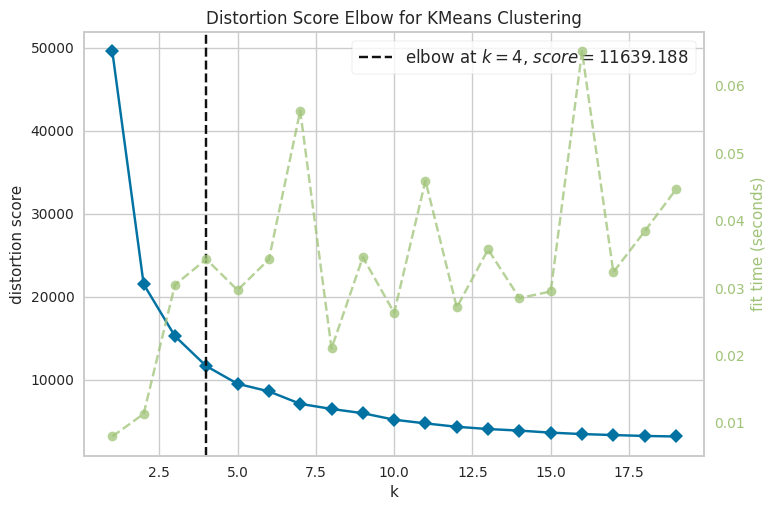

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
#Scale variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

elbow_vis = KElbowVisualizer(KMeans(random_state=42), k=(1, 20))
elbow_vis.fit(X_train_scaled)
elbow_vis.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

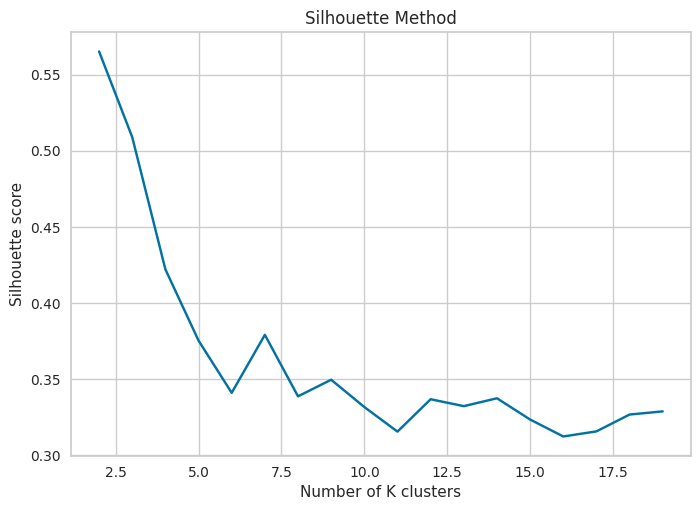

In [16]:
k_values = range(2, 20)

silhouette_scores = []

for k in k_values:
    cluster_labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, cluster_labels))

plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of K clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

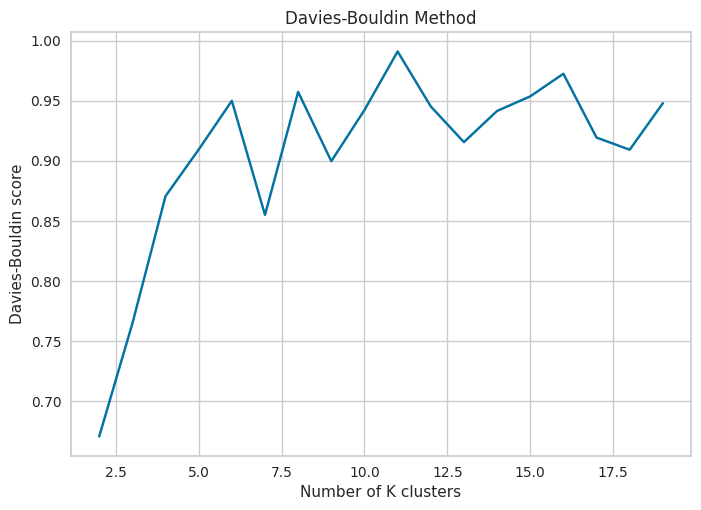

In [17]:
k_values = range(2, 20)

db_scores = []

for k in k_values:
    cluster_labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_train)
    db_scores.append(davies_bouldin_score(X_train, cluster_labels))

plt.plot(k_values, db_scores)
plt.xlabel('Number of K clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin Method')
plt.show()

In [ ]:
'''We can see that the model tends to two clusteres. In fact, if we had done it so that one cluster was an option, it would probably tend 
towards one. Since two clusters are not enough to make a proper K-Means Algortihm, we will instead use the standard of 4'''

#Generate the clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df.loc[X_train.index, 'cluster'] = kmeans.fit_predict(X_train_scaled)
df.loc[X_test.index, 'cluster'] = kmeans.predict(X_test_scaled)

df.head()

,Latitude,Longitude,MedInc,cluster
0,37.88,-122.23,8.3252,2.0
1,37.86,-122.22,8.3014,2.0
2,37.85,-122.24,7.2574,2.0
3,37.85,-122.25,5.6431,2.0
4,37.85,-122.25,3.8462,0.0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

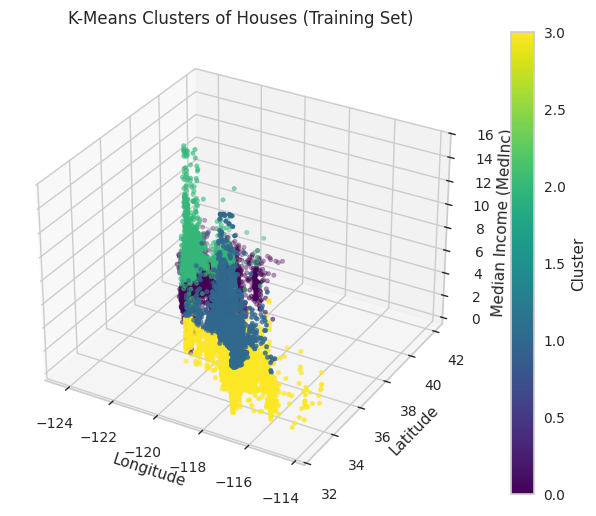

In [19]:
#Plot values
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train['Longitude'], 
    X_train['Latitude'], 
    X_train['MedInc'], 
    c=df.loc[X_train.index, 'cluster'],  # Color by cluster
    cmap='viridis', 
    s=10
)

ax.set_title('K-Means Clusters of Houses (Training Set)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Median Income (MedInc)')

plt.colorbar(scatter, ax=ax, label='Cluster')

plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

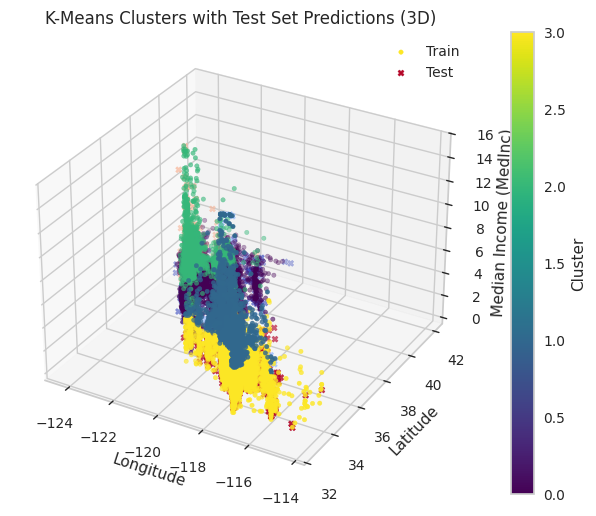

In [20]:
#Make predictions
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

train_scatter = ax.scatter(
    X_train['Longitude'], 
    X_train['Latitude'], 
    X_train['MedInc'], 
    c=df.loc[X_train.index, 'cluster'], 
    cmap='viridis', 
    s=10, 
    label="Train"
)

test_scatter = ax.scatter(
    X_test['Longitude'], 
    X_test['Latitude'], 
    X_test['MedInc'], 
    c=df.loc[X_test.index, 'cluster'], 
    cmap='coolwarm', 
    s=20, 
    marker='X', 
    label="Test"
)

ax.set_title('K-Means Clusters with Test Set Predictions (3D)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Median Income (MedInc)')

ax.legend()

plt.colorbar(train_scatter, ax=ax, label='Cluster')

plt.show()

In [21]:
#Train a supervised classification model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, df.loc[X_train.index, 'cluster'])
y_pred = clf.predict(X_test_scaled)

print(classification_report(df.loc[X_test.index, 'cluster'], y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1262
         1.0       1.00      1.00      1.00       620
         2.0       1.00      0.98      0.99       440
         3.0       1.00      1.00      1.00      1806

    accuracy                           1.00      4128
   macro avg       1.00      1.00      1.00      4128
weighted avg       1.00      1.00      1.00      4128



This model has almost perfect reults in both recall and precission, meaning that there are almost no errors in our predictions. However, such high numbers are quite rare in natural enviroments. It is quite possible that this model is suffering from overfitting, meaning that it has adjusted too much to our training data and that it could perfomr poorly on a different dataset. Some solutions to this would be to yse cross-validation, reduce model complexity, tune hyperparameters, or collect more diverse data.